In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import illustris_python as il

In [2]:
def Distance_1D(X, X_POS, BoxSize):
    '''This function takes as input a 1D 
    vector containing the positions of particles, 
    the X_POS(float) that is the position respect 
    to where we will compute the Distance and the BoxSize, 
    this function consider a periodical Box. 
    The output is a 1D vector with the same size than X 
    containing the distance from X to X_POS
    example:
        xc = Distance_1D(pos[gals,0], pos[central,0], (75000/h))
        yc = Distance_1D(pos[gals,1], pos[central,1], (75000/h))
        zc = Distance_1D(pos[gals,2], pos[central,2], (75000/h))
        # with the aim of use of the normpos
        normpos = np.sqrt(xc**2 + yc**2 + zc**2)/r200[group]
    '''
    
    D=X-X_POS
    D=np.where(D>BoxSize/2, D-BoxSize, D)
    D=np.where(D<-BoxSize/2, D+BoxSize, D)
    return D

In [3]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['Group_R_Crit200', 'GroupSFR', 'GroupMassType', 'GroupPos']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [4]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloSFR' ,
          'SubhaloStellarPhotometrics', 'SubhaloMassType', 
          'SubhaloGrNr', 'SubhaloPos']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [5]:
h = 0.6774

In [6]:
df_groups = pd.read_pickle('../generate_catalog/group_number_cat.pkl')

In [7]:
df_sats_05 = pd.read_pickle('../generate_catalog/satellites_cat/sample_at_05.pkl')
df_sats_1 = pd.read_pickle('../generate_catalog/satellites_cat/sample_at_1.pkl')

## testing for one halo

In [8]:
id_sats_group_0 = np.where(df_sats_05['group_index']==0)[0]
id_central_group_0 = id_sats_group_0[0]
id_sats_group_0 = id_sats_group_0[1:]

In [9]:
pos_sats_group_0 = subhalos['SubhaloPos'][id_sats_group_0]/h
pos_central_group_0 = subhalos['SubhaloPos'][id_central_group_0]/h

In [10]:
x = pos_sats_group_0[:, 0]
y = pos_sats_group_0[:, 1]
z = pos_sats_group_0[:, 2]
r200_group_0 = halos['Group_R_Crit200'][df_groups['05FossilR200'][0]]/h

In [11]:
xc = Distance_1D(x, pos_central_group_0[0], (75000/h))
yc = Distance_1D(y, pos_central_group_0[1], (75000/h))
zc = Distance_1D(z, pos_central_group_0[2], (75000/h))
        
normpos_group_0 = np.sqrt(xc**2 + yc**2 + zc**2)/r200_group_0

pos_inside_05 = normpos_group_0[np.where(normpos_group_0 <= 0.5)[0]]
id_inside_05 = np.where(normpos_group_0 <= 0.5)[0]

In [12]:
ssfr_group_0 = df_sats_05['sSFR'][id_sats_group_0]

Text(0, 0.5, 'sSFR')

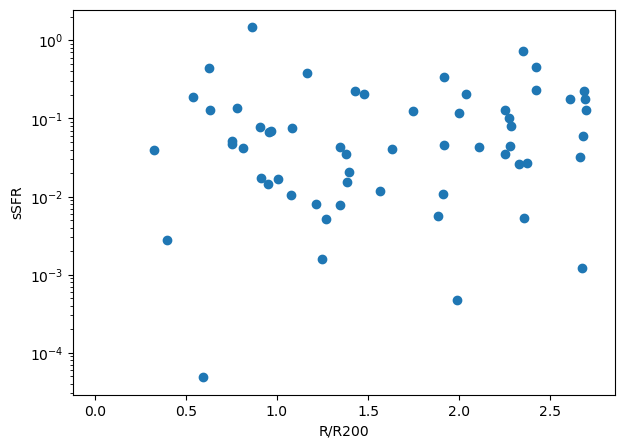

In [13]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(normpos_group_0, ssfr_group_0)
ax.set_yscale('log')
ax.set_xlabel('R/R200')
ax.set_ylabel('sSFR')

# testing for all the satellite galaxies

In [14]:
F05r200 = df_groups['05FossilR200']
NF05r200 = df_groups['05NFossilR200']

In [15]:
Fr200 = df_groups['1FossilR200']
NFr200 = df_groups['1NFossilR200']

In [16]:
stellar_mass_05 = df_sats_05['satellite_mass']

## specific star formation rate and QF for 05

In [17]:
threshold = 1e-11

In [18]:
F05sSFR_dict = {}
NF05sSFR_dict = {}

# Fósiles
for i in range(len(F05r200)):
    group_id = F05r200[i]
    group = np.where(df_sats_05['group_index'] == group_id)[0]
    F05sSFR_dict[group_id] = []

    for subhalo in range(1, len(group)):  # skip central
        subhalo_id = group[subhalo]
        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
        F05sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': float(sSFR)
        })

# No-fósiles
for i in range(len(NF05r200)):
    group_id = NF05r200[i]
    group = np.where(df_sats_05['group_index'] == group_id)[0]
    NF05sSFR_dict[group_id] = []

    for subhalo in range(1, len(group)):  # skip central
        subhalo_id = group[subhalo]
        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
        NF05sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': float(sSFR)
        })

/tmp/ipykernel_608/3328745010.py:12: RuntimeWarning: invalid value encountered in scalar divide
  sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
/tmp/ipykernel_608/3328745010.py:26: RuntimeWarning: invalid value encountered in scalar divide
  sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])


In [19]:
NF05sSFR_dict

{1: [{'subhalo_id': 2354, 'sSFR': 0.0},
  {'subhalo_id': 2355, 'sSFR': nan},
  {'subhalo_id': 2356, 'sSFR': 0.0},
  {'subhalo_id': 2357, 'sSFR': 0.0},
  {'subhalo_id': 2358, 'sSFR': nan},
  {'subhalo_id': 2359, 'sSFR': nan},
  {'subhalo_id': 2360, 'sSFR': nan},
  {'subhalo_id': 2361, 'sSFR': nan},
  {'subhalo_id': 2362, 'sSFR': nan},
  {'subhalo_id': 2363, 'sSFR': 0.0},
  {'subhalo_id': 2364, 'sSFR': 0.0},
  {'subhalo_id': 2365, 'sSFR': 0.0},
  {'subhalo_id': 2366, 'sSFR': nan},
  {'subhalo_id': 2367, 'sSFR': 0.0},
  {'subhalo_id': 2368, 'sSFR': nan},
  {'subhalo_id': 2369, 'sSFR': 0.0},
  {'subhalo_id': 2370, 'sSFR': nan},
  {'subhalo_id': 2371, 'sSFR': 0.0},
  {'subhalo_id': 2372, 'sSFR': 0.0},
  {'subhalo_id': 2373, 'sSFR': nan},
  {'subhalo_id': 2374, 'sSFR': nan},
  {'subhalo_id': 2375, 'sSFR': nan},
  {'subhalo_id': 2376, 'sSFR': 0.0},
  {'subhalo_id': 2377, 'sSFR': nan},
  {'subhalo_id': 2378, 'sSFR': 0.0},
  {'subhalo_id': 2379, 'sSFR': 0.0},
  {'subhalo_id': 2380, 'sSFR': 0.0}

In [20]:
# Para los fósiles
for i, group_id in enumerate(F05r200):
    sSFR_vals = [entry['sSFR'] for entry in F05sSFR_dict[group_id]]
    if len(sSFR_vals) > 0:
        quenched = np.sum(np.array(sSFR_vals) < threshold)
        QF = quenched / len(sSFR_vals)
    else:
        QF = np.nan  # o 0, según tu criterio

    # Agregamos como nueva entrada en el diccionario
    F05sSFR_dict[group_id] = {
        'members': F05sSFR_dict[group_id],
        'QF': QF
    }

# Para los no-fósiles
for i, group_id in enumerate(NF05r200):
    sSFR_vals = [entry['sSFR'] for entry in NF05sSFR_dict[group_id]]
    if len(sSFR_vals) > 0:
        quenched = np.sum(np.array(sSFR_vals) < threshold)
        QF = quenched / len(sSFR_vals)
    else:
        QF = np.nan

    NF05sSFR_dict[group_id] = {
        'members': NF05sSFR_dict[group_id],
        'QF': QF
    }


## specific star formation rate and QF for 1

In [21]:
F1sSFR_dict = {}
NF1sSFR_dict = {}

# Fósiles
for i in range(len(Fr200)):
    group_id = Fr200[i]
    group = np.where(df_sats_05['group_index'] == group_id)[0]
    F1sSFR_dict[group_id] = []

    for subhalo in range(1, len(group)):  # skip central
        subhalo_id = group[subhalo]
        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
        F1sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': float(sSFR)
        })

# No-fósiles
for i in range(len(NFr200)):
    group_id = NFr200[i]
    group = np.where(df_sats_05['group_index'] == group_id)[0]
    NF1sSFR_dict[group_id] = []

    for subhalo in range(1, len(group)):  # skip central
        subhalo_id = group[subhalo]
        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
        NF1sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': float(sSFR)
        })

/tmp/ipykernel_608/1807481374.py:12: RuntimeWarning: invalid value encountered in scalar divide
  sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
/tmp/ipykernel_608/1807481374.py:26: RuntimeWarning: invalid value encountered in scalar divide
  sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])


In [22]:
# Para los fósiles
for i, group_id in enumerate(Fr200):
    sSFR_vals = [entry['sSFR'] for entry in F1sSFR_dict[group_id]]
    if len(sSFR_vals) > 0:
        quenched = np.sum(np.array(sSFR_vals) < threshold)
        QF = quenched / len(sSFR_vals)
    else:
        QF = np.nan  # o 0, según tu criterio

    # Agregamos como nueva entrada en el diccionario
    F1sSFR_dict[group_id] = {
        'members': F1sSFR_dict[group_id],
        'QF': QF
    }

# Para los no-fósiles
for i, group_id in enumerate(NFr200):
    sSFR_vals = [entry['sSFR'] for entry in NF1sSFR_dict[group_id]]
    if len(sSFR_vals) > 0:
        quenched = np.sum(np.array(sSFR_vals) < threshold)
        QF = quenched / len(sSFR_vals)
    else:
        QF = np.nan

    NF1sSFR_dict[group_id] = {
        'members': NF1sSFR_dict[group_id],
        'QF': QF
    }


In [23]:
QF_05_list = []
QF_05_dict = {}

for group_id, data in F05sSFR_dict.items():
    qf = data['QF']
    QF_05_list.append(qf)
    QF_05_dict[group_id] = qf


In [24]:
QF_NF05_list = []
QF_NF05_dict = {}

for group_id, data in NF05sSFR_dict.items():
    qf = data['QF']
    QF_NF05_list.append(qf)
    QF_NF05_dict[group_id] = qf

In [25]:
medianQF = np.median(QF_05_list)
mediannQF = np.median(QF_NF05_list)
meanQF = np.mean(QF_05_list)
meannQF = np.mean(QF_NF05_list)

In [26]:
QF_1_list = []
QF_1_dict = {}

for group_id, data in F1sSFR_dict.items():
    qf = data['QF']
    QF_1_list.append(qf)
    QF_1_dict[group_id] = qf


In [27]:
QF_NF1_list = []
QF_NF1_dict = {}

for group_id, data in NF1sSFR_dict.items():
    qf = data['QF']
    QF_NF1_list.append(qf)
    QF_NF1_dict[group_id] = qf

In [28]:
medianQF = np.median(QF_1_list)
mediannQF = np.median(QF_NF1_list)
meanQF = np.mean(QF_1_list)
meannQF = np.mean(QF_NF1_list)

In [29]:
weight_fossil = np.ones_like(QF_05_list)/len(F05r200)
weight_nonfossil = np.ones_like(QF_NF05_list)/len(NF05r200)
#bins= np.arange(0, 1, 0.025)
bins= int(1 + np.log2(len(F05r200)+len(NF05r200)))

In [30]:
weight_fossil_1 = np.ones_like(QF_1_list)/len(Fr200)
weight_nonfossil_1 = np.ones_like(QF_NF1_list)/len(NFr200)
#bins= np.arange(0, 1, 0.025)
bins_1 = int(1 + np.log2(len(Fr200)+len(NFr200)))

Text(0.5, 0.01, 'quenching fraction (% of quenched galaxies per halo)')

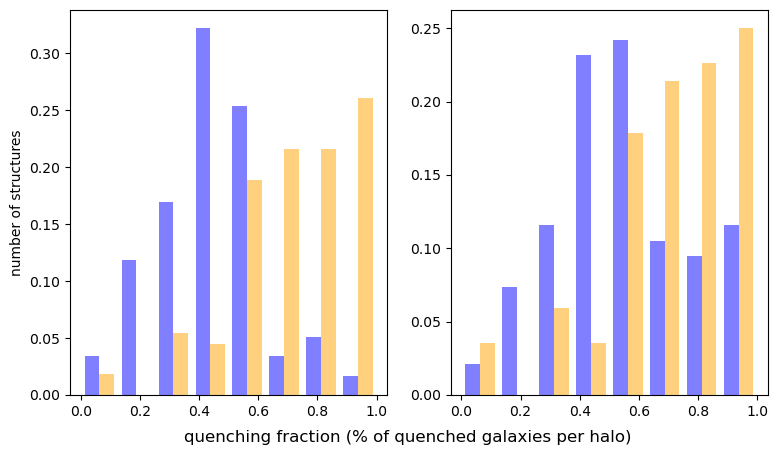

In [31]:
fig, ax = plt.subplots(1,2, figsize=(9,5))

ax[0].hist([QF_NF05_list,QF_05_list], bins=bins, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil, weight_fossil], cumulative=False)
ax[1].hist([QF_NF1_list,QF_1_list], bins=bins, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil_1, weight_fossil_1], cumulative=False)

ax[0].set_ylabel('number of structures')
fig.supxlabel('quenching fraction (% of quenched galaxies per halo)')


In [32]:
df_05 = pd.DataFrame({
    'QF': QF_NF05_list + QF_05_list,
    'state': ['no-fósil'] * len(QF_NF05_list) + ['fósil'] * len(QF_05_list)
})

df_1 = pd.DataFrame({
    'QF': QF_NF1_list + QF_1_list,
    'state': ['no-fósil'] * len(QF_NF1_list) + ['fósil'] * len(QF_1_list)
})

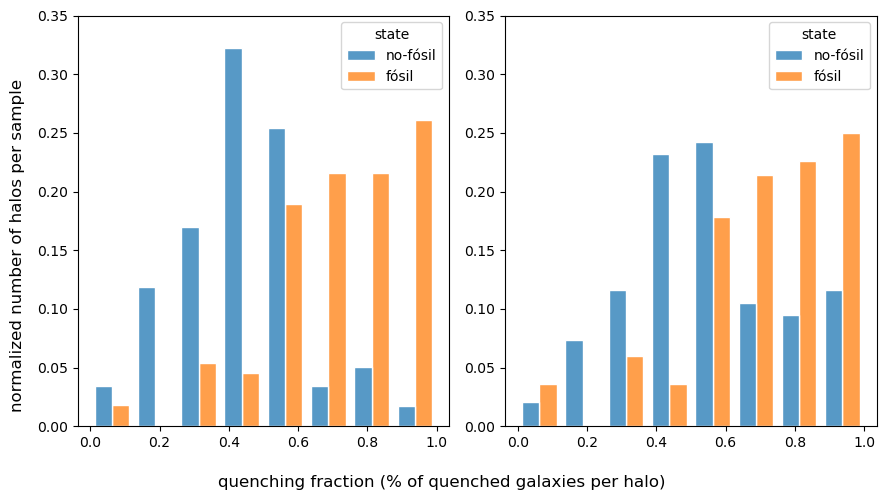

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=df_05, x='QF', hue='state', 
             bins=bins, stat='proportion', element='bars', 
             common_norm=False, ax=ax[0], multiple='dodge', 
             shrink=0.8, edgecolor='white')

sns.histplot(data=df_1, x='QF', hue='state',
             bins=bins, stat='proportion', element='bars',
             common_norm=False, ax=ax[1], multiple='dodge', 
             shrink=0.8, edgecolor='white')

# Quitar etiquetas de ejes individuales
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(0,0.35)

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,0.35)
# Etiqueta común en el eje x
fig.supylabel('normalized number of halos per sample')
fig.supxlabel('quenching fraction (% of quenched galaxies per halo)')

plt.tight_layout()
plt.show()


## cumulative quenching fraction

In [34]:
binsnf = np.linspace(0, 1, num=len(QF_NF05_list))
binsf = np.linspace(0, 1, num=len(QF_05_list))

binsnf1 = np.linspace(0, 1, num=len(QF_NF1_list))
binsf1 = np.linspace(0, 1, num=len(QF_1_list))

In [35]:
bins= np.linspace(0, 1, num=50)

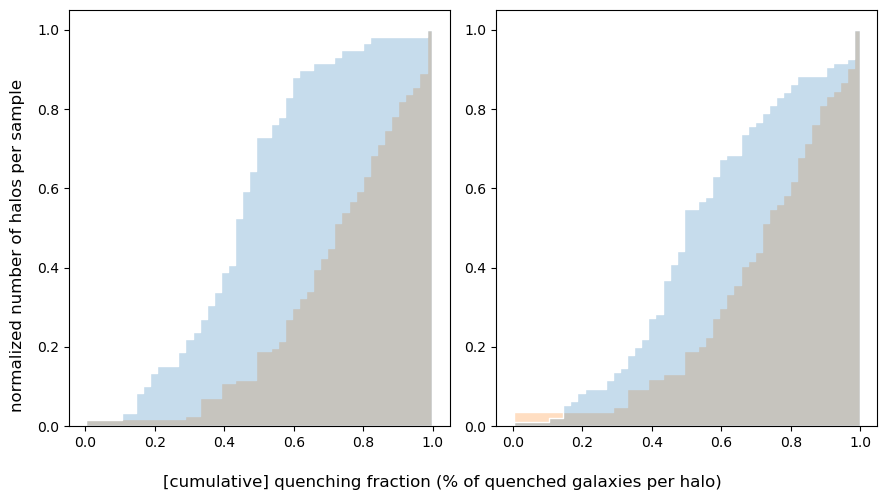

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=df_05, x='QF', hue='state', 
             bins=bins, stat='proportion', element='step', 
             common_norm=False, ax=ax[0], multiple='layer', 
             shrink=0.8, edgecolor='white', cumulative=True, legend='')

sns.histplot(data=df_1, x='QF', hue='state',
             bins=bins, stat='proportion', element='step',
             common_norm=False, ax=ax[1], multiple='layer', 
             shrink=0.8, edgecolor='white', cumulative=True, legend='')

# Quitar etiquetas de ejes individuales
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(0,1.05)

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,1.05)
# Etiqueta común en el eje x
fig.supylabel('normalized number of halos per sample')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_608/3176813914.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


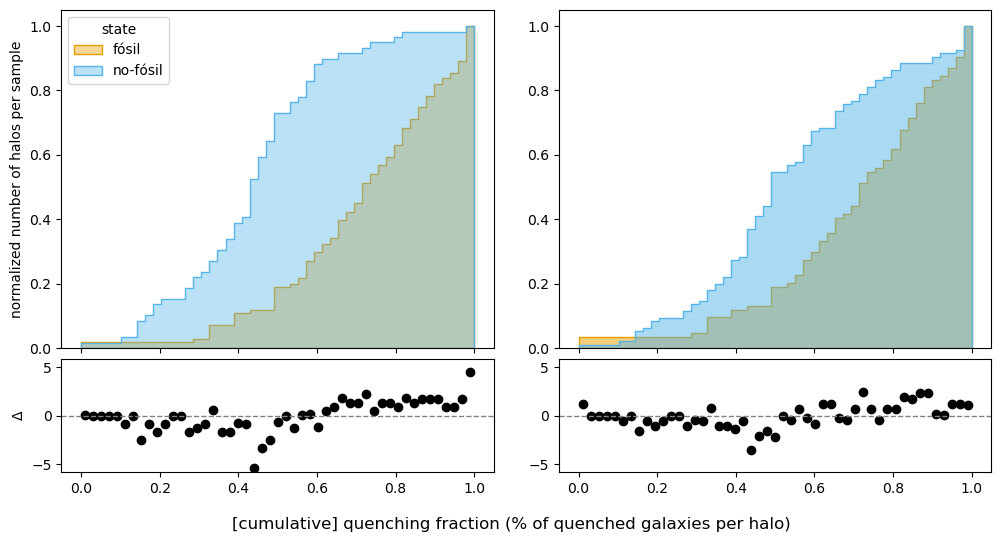

In [37]:
from matplotlib.gridspec import GridSpec

palette = {'fósil': '#E69F00', 'no-fósil': '#56B4E9'}

# Bins comunes para ambas comparaciones
bins = np.linspace(0, 1, 50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Función para calcular histograma y diferencia
def compute_hist_and_diff(df, bins):
    fosil = df[df['state'] == 'fósil']['QF']
    nofosil = df[df['state'] == 'no-fósil']['QF']
    
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    return fosil, nofosil, h_fosil, h_nofosil, h_fosil - h_nofosil

# Calcular para ambas muestras
f05, nf05, h_f05, h_nf05, diff_05 = compute_hist_and_diff(df_05, bins)
f1, nf1, h_f1, h_nf1, diff_1 = compute_hist_and_diff(df_1, bins)

# Crear figura con 2 columnas y 2 filas
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, height_ratios=[3, 1], hspace=0.05, wspace=0.15)

# Panel 05
ax_05_main = fig.add_subplot(gs[0, 0])
ax_05_diff = fig.add_subplot(gs[1, 0], sharex=ax_05_main)

sns.histplot(f05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)
sns.histplot(nf05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)

ax_05_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_05_diff.scatter(bin_centers, diff_05, color='black')

# Panel 1
ax_1_main = fig.add_subplot(gs[0, 1])
ax_1_diff = fig.add_subplot(gs[1, 1], sharex=ax_1_main)

sns.histplot(f1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)
sns.histplot(nf1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)

ax_1_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_1_diff.scatter(bin_centers, diff_1, color='black')

# Etiquetas y leyenda
ax_05_main.set_ylabel('normalized number of halos per sample')
ax_05_diff.set_ylabel('Δ')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')


# Limpiar etiquetas X arriba
ax_05_main.set_xlabel('')
ax_1_main.set_xlabel('')
plt.setp(ax_05_main.get_xticklabels(), visible=False)
plt.setp(ax_1_main.get_xticklabels(), visible=False)

ax_1_main.set_ylabel('')
ax_1_diff.set_ylabel('')

ax_05_diff.set_ylim(-5.8, 5.8)
ax_1_diff.set_ylim(-5.8, 5.8)
# Leyenda solo en uno
ax_05_main.legend(title='state', loc='upper left')

plt.tight_layout()
plt.show()

In [38]:
def compute_cdf_and_diff(df, bins):
    fosil = df[df['state'] == 'fósil']['QF']
    nofosil = df[df['state'] == 'no-fósil']['QF']
    
    # Histograma normalizado
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    # CDF (suma acumulada de las proporciones)
    cdf_fosil = np.cumsum(h_fosil * np.diff(bins))
    cdf_nofosil = np.cumsum(h_nofosil * np.diff(bins))
    
    return fosil, nofosil, cdf_fosil, cdf_nofosil, cdf_fosil - cdf_nofosil

/tmp/ipykernel_608/1071167314.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


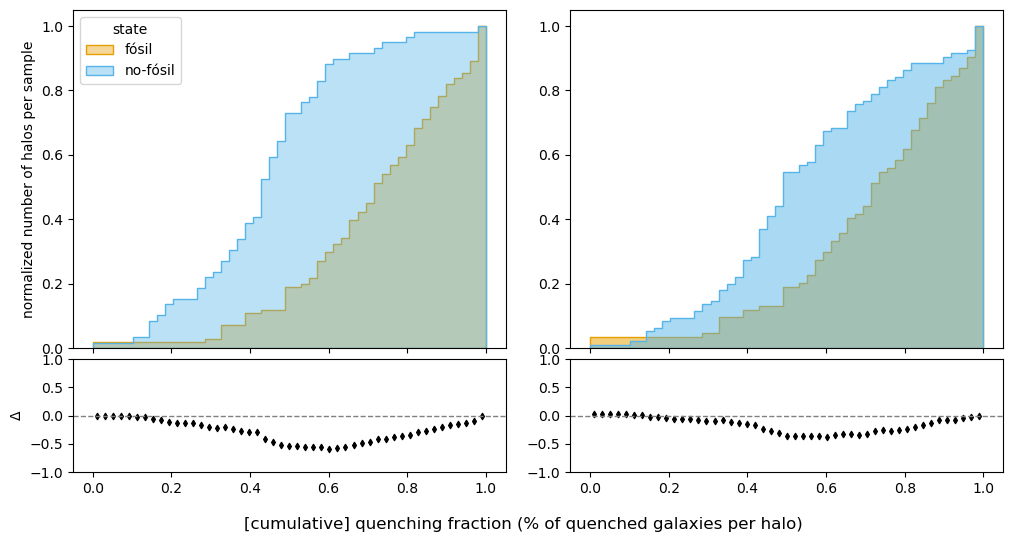

In [39]:
from matplotlib.gridspec import GridSpec

palette = {'fósil': '#E69F00', 'no-fósil': '#56B4E9'}

# Bins comunes para ambas comparaciones
bins = np.linspace(0, 1, 50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Función para calcular histograma y diferencia
def compute_cdf_and_diff(df, bins):
    fosil = df[df['state'] == 'fósil']['QF']
    nofosil = df[df['state'] == 'no-fósil']['QF']
    
    # Histograma normalizado
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    # CDF (suma acumulada de las proporciones)
    cdf_fosil = np.cumsum(h_fosil * np.diff(bins))
    cdf_nofosil = np.cumsum(h_nofosil * np.diff(bins))
    
    return fosil, nofosil, cdf_fosil, cdf_nofosil, cdf_fosil - cdf_nofosil

# Calcular para ambas muestras con CDF
f05, nf05, cdf_f05, cdf_nf05, diff_05 = compute_cdf_and_diff(df_05, bins)
f1, nf1, cdf_f1, cdf_nf1, diff_1 = compute_cdf_and_diff(df_1, bins)


# Crear figura con 2 columnas y 2 filas
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, height_ratios=[3, 1], hspace=0.05, wspace=0.15)

# Panel 05
ax_05_main = fig.add_subplot(gs[0, 0])
ax_05_diff = fig.add_subplot(gs[1, 0], sharex=ax_05_main)

sns.histplot(f05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)
sns.histplot(nf05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)

ax_05_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_05_diff.scatter(bin_centers, diff_05, color='black', s=10, marker='d')

# Panel 1
ax_1_main = fig.add_subplot(gs[0, 1])
ax_1_diff = fig.add_subplot(gs[1, 1], sharex=ax_1_main)

sns.histplot(f1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)
sns.histplot(nf1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)

ax_1_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_1_diff.scatter(bin_centers, diff_1, color='black', s=10, marker='d')


# Etiquetas y leyenda
ax_05_main.set_ylabel('normalized number of halos per sample')
ax_05_diff.set_ylabel('Δ')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')


# Limpiar etiquetas X arriba
ax_05_main.set_xlabel('')
ax_1_main.set_xlabel('')
plt.setp(ax_05_main.get_xticklabels(), visible=False)
plt.setp(ax_1_main.get_xticklabels(), visible=False)

ax_1_main.set_ylabel('')
ax_1_diff.set_ylabel('')

ax_05_diff.set_ylim(-1, 1)
ax_1_diff.set_ylim(-1, 1)
# Leyenda solo en uno
ax_05_main.legend(title='state', loc='upper left')


plt.tight_layout()
plt.show()


## ks-tests

In [40]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [41]:
print(ks_2samp(QF_05_list, QF_NF05_list))
print(ks_2samp(QF_05_list, QF_NF05_list, alternative='less'))

KstestResult(statistic=0.5919987784394564, pvalue=3.9373149920281553e-13, statistic_location=0.6204379562043796, statistic_sign=-1)
KstestResult(statistic=0.5919987784394564, pvalue=1.9686574960139698e-13, statistic_location=0.6204379562043796, statistic_sign=-1)


In [42]:
print(ks_2samp(QF_1_list, QF_NF1_list))
print(ks_2samp(QF_1_list, QF_NF1_list, alternative='less'))

KstestResult(statistic=0.3779448621553885, pvalue=3.2700386344632654e-06, statistic_location=0.5403225806451613, statistic_sign=-1)
KstestResult(statistic=0.3779448621553885, pvalue=1.6350193172313487e-06, statistic_location=0.5403225806451613, statistic_sign=-1)


## lopes+2024

In [43]:
def compute_Rnorm_for_group(id_sats_group, id_central_group, subhalo_pos, r200, box_size):
    pos_sats = subhalo_pos[id_sats_group] / h
    pos_central = subhalo_pos[id_central_group] / h

    x = pos_sats[:, 0]
    y = pos_sats[:, 1]
    z = pos_sats[:, 2]

    xc = Distance_1D(x, pos_central[0], box_size)
    yc = Distance_1D(y, pos_central[1], box_size)
    zc = Distance_1D(z, pos_central[2], box_size)

    normpos = np.sqrt(xc**2 + yc**2 + zc**2) / r200
    return normpos


In [44]:
box_size = 75000 / h  # el tamaño de la caja ya normalizado
subhalo_pos = subhalos['SubhaloPos']
group_r200s = halos['Group_R_Crit200']

for d, df_dict, label in zip(
    [df_groups['05FossilR200'], df_groups['1FossilR200']],
    [F05sSFR_dict, NF05sSFR_dict],
    ['fósil', 'no-fósil']
):
    for group_id in df_dict:
        group_mask = df_sats_05['group_index'] == group_id  # o df_sats_1 si es F1sSFR_dict
        id_sats_group = np.where(group_mask)[0]
        if len(id_sats_group) < 2:
            continue  # saltar grupos mal definidos

        id_central = id_sats_group[0]
        id_sats_only = id_sats_group[1:]  # solo satélites

        r200_index = group_id
        r200 = group_r200s[r200_index] / h

        rnorm = compute_Rnorm_for_group(
            id_sats_only,
            id_central,
            subhalo_pos,
            r200,
            box_size
        )

        # Agregar al diccionario
        df_dict[group_id]['Rnorm'] = rnorm


In [45]:
entries = F05sSFR_dict[0]
for i, e in enumerate(F05sSFR_dict[0]):
    print(f"Entry {i}: {e}, type: {type(e)}")


Entry 0: members, type: <class 'str'>
Entry 1: QF, type: <class 'str'>
Entry 2: Rnorm, type: <class 'str'>


In [46]:
def plot_sSFR_vs_Rnorm(group_id, sSFR_dict, centrals_df, subhalo_pos, r200_array, box_size):
    entries = sSFR_dict[group_id]

    if len(entries) == 0:
        return

    # IDs de subhalos satélites
    entries = [dict(e) for e in sSFR_dict[group_id]]
    sat_ids = [entry['subhalo_id'] for entry in entries]
    ssfr_vals = [entry['sSFR'] for entry in entries]

    # Central: asumimos el primer miembro del grupo en el df original
    group_mask = centrals_df['group_index'] == group_id
    central_id = np.where(group_mask)[0][0]
    central_pos = subhalo_pos[central_id] / h

    # Posiciones de satélites
    pos_sats = subhalo_pos[sat_ids] / h
    x, y, z = pos_sats[:, 0], pos_sats[:, 1], pos_sats[:, 2]

    xc = Distance_1D(x, central_pos[0], box_size)
    yc = Distance_1D(y, central_pos[1], box_size)
    zc = Distance_1D(z, central_pos[2], box_size)

    r_norm = np.sqrt(xc**2 + yc**2 + zc**2) / (r200_array[group_id] / h)

    # Graficar
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(r_norm, ssfr_vals, s=10, alpha=0.7)
    ax.set_yscale('log')
    ax.set_xlim(0, 2)
    ax.set_xlabel('R / R200')
    ax.set_ylabel('sSFR [1/yr]')
    ax.set_title(f'Grupo fósil {group_id}')
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(f"sSFR_vs_Rnorm_group_{group_id}.png", dpi=300)

    plt.show()


In [47]:
box_size = 75000 / h  # tamaño caja en Mpc/h
r200_fosiles = halos['Group_R_Crit200']  # indexado por group_id

plot_sSFR_vs_Rnorm(
    group_id=F05r200[0],
    sSFR_dict=F05sSFR_dict,
    centrals_df=df_sats_05,
    subhalo_pos=subhalos['SubhaloPos'],
    r200_array=r200_fosiles,
    box_size=box_size
)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [ ]:
F05sSFR_dict[0]

In [ ]:
# Iterar sobre cada grupo fósil
import os

unique_groups = df_sats_05['group_index'].unique()

os.makedirs('ssfr_vs_r200_fossil', exist_ok=True)


for group_idx in unique_groups:
    # Índices del grupo
    ids_in_group = np.where(df_sats_05['group_index'] == group_idx)[0]
    
    if len(ids_in_group) < 2:
        continue  # saltar si no hay suficientes satélites
    
    id_central = ids_in_group[0]
    id_sats = ids_in_group[1:]

    # Posiciones (en Mpc/h)
    pos_central = subhalos['SubhaloPos'][id_central] / h
    pos_sats = subhalos['SubhaloPos'][id_sats] / h

    # Coordenadas
    x, y, z = pos_sats[:, 0], pos_sats[:, 1], pos_sats[:, 2]

    # R200 del grupo correspondiente
    r200 = halos['Group_R_Crit200'][group_idx] / h

    # Distancias centradas
    xc = Distance_1D(x, pos_central[0], (75000/h))
    yc = Distance_1D(y, pos_central[1], (75000/h))
    zc = Distance_1D(z, pos_central[2], (75000/h))
    r_norm = np.sqrt(xc**2 + yc**2 + zc**2) / r200

    # sSFR
    ssfr = df_sats_05['sSFR'].iloc[id_sats]

    # Graficar
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(r_norm, ssfr, s=10, alpha=0.7)
    ax.set_yscale('log')
    ax.set_xlim(0, 2)
    ax.set_xlabel('R / R200')
    ax.set_ylabel('sSFR [1/yr]')
    ax.set_title(f'Grupo fósil #{group_idx}')

    plt.tight_layout()
    plt.savefig(f'ssfr_vs_r200_fossil/group_{group_idx}.png')
    plt.close()